In [2]:
import math
import random
import copy
from matplotlib import pyplot as plt

In [33]:
global N
global state
global avail

In [62]:
def forward_checking(n, a):
    global state, avail
    state[n] = a
    for i in range(n + 1, N):
        avail[i][a] += 1
        if a + i - n < N:
            avail[i][a + i - n] += 1
        if a - i + n >= 0:
            avail[i][a - i + n] += 1

def reset_forward_checking(n, a):
    global state, avail
    state[n] = -1
    for i in range(n + 1, N):
        avail[i][a] -= 1
        if a + i - n < N:
            avail[i][a + i - n] -= 1
        if a - i + n >= 0:
            avail[i][a - i + n] -= 1

def dfs_forward_checking(n):
    global avail
    if n >= N:
        return 1

    ret = 0
    for (a, num) in enumerate(avail[n]):
        if num > 0:
            continue
        forward_checking(n, a, avail)
        ret += dfs_forward_checking(n + 1, avail)
        reset_forward_checking(n, a, avail)
    return ret

def dfs_FC_1(n):
    global avail:
    if n >= N:
        global state
        print(state)
        return True

    for (a, num) in enumerate(avail[n]):
        if num > 0:
            continue
        forward_checking(n, a, avail)
        if dfs_FC_1(n + 1, avail):
            return True
        reset_forward_checking(n, a, avail)
    return False

def n_queens(n):
    global N, state, avail
    N = n
    state = [-1 for i in range(N)]
    avail = [[0 for j in range(N)] for i in range(N)]
    return dfs_forward_checking(0)

def n_queen(n):
    global N, state, avail
    N = n
    state = [-1 for i in range(N)]
    avail = [[0 for j in range(N)] for i in range(N)]
    return dfs_FC_1(0)

SyntaxError: invalid syntax (<ipython-input-62-8a8a42911269>, line 36)

In [59]:
def check_backtracking(n, a):
    global state
    for i in range(n):
        if a == state[i] or a + n - i == state[i] or a - n + i == state[i]:
            return False
    return True

def dfs_backtracking(n):
    global state
    if n >= N:
        return 1
    ret = 0
    for i in range(N):
        if not check_backtracking(n, i):
            continue
        state[n] = i
        ret += dfs_backtracking(n + 1)
        state[n] = -1
    return ret

def dfs_BT_1(n):
    global state
    if n >= N:
        print(state)
        return True
    for i in range(N):
        if not check_backtracking(n, i):
            continue
        state[n] = i
        if dfs_BT_1(n + 1):
            return True
        state[n] = -1
    return False

def n_queens2(n):
    global N, state
    N = n
    state = [-1 for i in range(N)]
    return dfs_backtracking(0)

def n_queen2(n):
    global N, state
    N = n
    state = [-1 for i in range(N)]
    return dfs_BT_1(0)

In [53]:
%time n_queens(10)

CPU times: user 96.7 ms, sys: 3 µs, total: 96.7 ms
Wall time: 96.1 ms


724

In [54]:
%time n_queens2(10)

CPU times: user 252 ms, sys: 0 ns, total: 252 ms
Wall time: 251 ms


724

In [64]:
%time n_queens(10)

CPU times: user 122 ms, sys: 0 ns, total: 122 ms
Wall time: 120 ms


724

In [56]:
%time n_queen(26)

[0, 2, 4, 1, 3, 8, 10, 12, 14, 20, 22, 24, 19, 21, 23, 25, 9, 6, 15, 11, 7, 5, 17, 13, 18, 16]
CPU times: user 2.37 s, sys: 60 µs, total: 2.37 s
Wall time: 2.37 s


True

In [61]:
%time n_queen2(26)

[0, 2, 4, 1, 3, 8, 10, 12, 14, 20, 22, 24, 19, 21, 23, 25, 9, 6, 15, 11, 7, 5, 17, 13, 18, 16]
CPU times: user 14.2 s, sys: 186 µs, total: 14.2 s
Wall time: 14.2 s


True

In [65]:
%time n_queen(26)

[0, 2, 4, 1, 3, 8, 10, 12, 14, 20, 22, 24, 19, 21, 23, 25, 9, 6, 15, 11, 7, 5, 17, 13, 18, 16]
CPU times: user 2.41 s, sys: 38 µs, total: 2.41 s
Wall time: 2.41 s


True

In [27]:
def draw_fig(source_file, target_file, num):
    with open(source_file) as fs:
        ls = fs.readlines()
        ls = list(map(lambda l: list(map(float, l.split())), ls))
        X = list(range(len(ls)))[-num:]
        Y1 = [l[0] for l in ls][-num:]
        Y2 = [l[1] for l in ls][-num:]
        plt.plot(X, Y1, label = "forward checking")
        plt.plot(X, Y2, label = "back tracking")
        plt.legend()
        plt.title(target_file)
        plt.xlabel("N")
        plt.ylabel("Time")
        plt.savefig(target_file)
        plt.show()

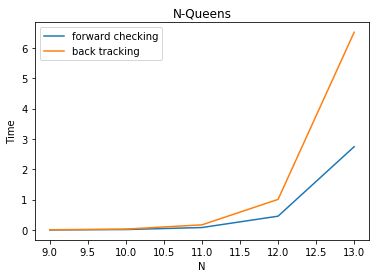

In [28]:
draw_fig("nQueens.txt", "N-Queens", 5)

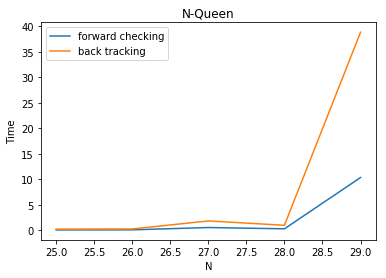

In [30]:
draw_fig("nQueen.txt", "N-Queen", 5)

In [82]:
global f
def ff(n):
    global f
    if n <= 2:
        f[n] = 1
        return f[n]
    f[n] = ff(n - 1) + ff(n - 2)
    return f[n]

def fff(n, f):
    if n <= 2:
        f[n] = 1
        return f[n]
    f[n] = fff(n - 1, f) + fff(n - 2, f)
    return f[n]

In [87]:
f = [0 for i in range(100)]
%time ff(35)
f = [0 for i in range(100)]
%time fff(35, f)

CPU times: user 2.05 s, sys: 9.95 ms, total: 2.06 s
Wall time: 2.06 s
CPU times: user 1.89 s, sys: 3.33 ms, total: 1.89 s
Wall time: 1.89 s


9227465

In [84]:
f = [0 for i in range(100)]
%time fff(35, f)

CPU times: user 1.93 s, sys: 5 µs, total: 1.93 s
Wall time: 1.93 s


9227465